<a href="https://colab.research.google.com/github/mazenomran/Surface-defect-detection/blob/main/Many_spatial_features_for_Tile_defects_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import the necessary libraries

In [2]:
import cv2
import pandas as pd
import numpy as np
import os
from skimage.filters import roberts, sobel, scharr, prewitt
from scipy import ndimage as nd
import time
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay
import pickle
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import preprocessing

#Preparing paths and empty lists to save data in

In [3]:
img_path = "/content/drive/MyDrive/augmented_train/"
img_path1 = "/content/drive/MyDrive/augmented_test/"
#SubDatasets for binary classification
X_train =[]
y_train = []
X_test = []
y_test = []
#SubDatasets for multiclass classification
X_train1 =[]
y_train1 = []
X_test1 = []
y_test1 = []

#Preparing and labeling training data

In [ ]:
for image in os.listdir(img_path):  # iterate through each file
    if image.split('.')[0][:3] == "Def":
        y_train.append(1)
    else:
        y_train.append(0)

    input_img = cv2.imread(img_path + image)  # Read images
    img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (105, 105))
    X_train.append(img)

In [ ]:
print(len(os.listdir(img_path1)))

218


##Preparing and labeling testing data


In [ ]:
for image1 in os.listdir(img_path1):  # iterate through each file
    if image1.split('.')[0][:3] == "Def":
        y_test.append(1)
    else:
        y_test.append(0)

    input_img1 = cv2.imread(img_path1 + image1)  # Read images
    img1 = cv2.cvtColor(input_img1, cv2.COLOR_BGR2GRAY)
    img1 = cv2.resize(img1, (105, 105))
    X_test.append(img1)

#Training dataset for multiclass classification

In [4]:
for image in os.listdir(img_path):  # iterate through each file
    if 'cra' in image :
      y_train1.append(1)
    elif 'oil' in image :
      y_train1.append(2)
    elif 'glu' in image :
      y_train1.append(3)
    elif 'gra' in image :
      y_train1.append(4)
    elif 'rou' in image :
      y_train1.append(5)
    else:
        y_train1.append(0)
    input_img = cv2.imread(img_path + image)  # Read images
    img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (105, 105))
    X_train1.append(img)

#Testing dataset for multiclass classification

In [5]:
for image in os.listdir(img_path1):  # iterate through each file
    if 'cra' in image :
      y_test1.append(1)
    elif 'oil' in image :
      y_test1.append(2)
    elif 'glu' in image :
      y_test1.append(3)
    elif 'gra' in image :
      y_test1.append(4)
    elif 'rou' in image :
      y_test1.append(5)
    else:
        y_test1.append(0)
    input_img = cv2.imread(img_path1 + image)  # Read images
    img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (105, 105))
    X_test1.append(img)

In [ ]:
print(len(X_test))

218


In [6]:
X_train= np.array(X_train)
y_train= np.array(y_train)
X_test= np.array(X_test)
y_test= np.array(y_test)

X_train1= np.array(X_train1)
y_train1= np.array(y_train1)
X_test1= np.array(X_test1)
y_test1= np.array(y_test1)

#Plot some data samples

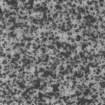

Good


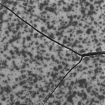

Crack


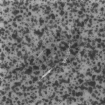

Oil


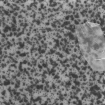

Glue_strip


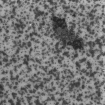

Gray_stroke


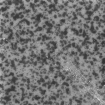

Rough


In [ ]:
from google.colab.patches import cv2_imshow
for i in [750, 525,625, 520, 552, 644]:
  cv2_imshow(X_train1[i, :,:])
  print(y_train1[i,])

#In case of labeling data by the status name (as in plots above) and we want to encode them before training the model

In [ ]:
#Encode labels from text (folder names) to integers.
encoder = preprocessing.LabelEncoder()
encoder.fit(y_test1)
y_test1_encoded = encoder.transform(y_test1)
encoder.fit(y_train1)
y_train1_encoded = encoder.transform(y_train1)

# Normalize pixel values to between 0 and 1

In [ ]:
X_train1.shape

(974, 105, 105)

#Plot samples data after encoding

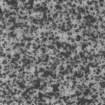

2


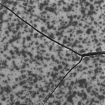

0


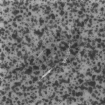

4


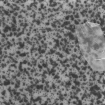

1


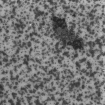

3


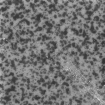

5


In [ ]:
from google.colab.patches import cv2_imshow
for i in [750, 525,625, 520, 552, 644]:
  cv2_imshow(X_train1[i, :,:])
  print(y_train1_encoded[i,])


# FEATURE EXTRACTOR function

In [7]:
# input shape is (n, x, y, c) - number of images, x, y, and channels
def feature_extractor(dataset):
    x_train = dataset
    image_dataset = pd.DataFrame()
    for image in range(x_train.shape[0]):  #iterate through each file 
        #print(image)
        
        df = pd.DataFrame()  #Temporary data frame to capture information for each loop.
        #Reset dataframe to blank after each loop.
        
        input_img = x_train[image, :,:]
        img = input_img
    ################################################################
    #START ADDING DATA TO THE DATAFRAME
    #Add feature extractors, e.g. edge detection, smoothing, etc. 
            
         # FEATURE 1 - Pixel values
         
        #Add pixel values to the data frame
        pixel_values = img.reshape(-1)/255.0
        df['Pixel_Value'] = pixel_values  #Pixel value itself as a feature
        #df['Image_Name'] = image   #Capture image name as we read multiple images

         # ROBERTS EDGE
        edge_roberts = roberts(img)
        edge_roberts1 = edge_roberts.reshape(-1)
        df['Roberts'] = edge_roberts1

        # SOBEL
        edge_sobel = sobel(img)
        edge_sobel1 = edge_sobel.reshape(-1)
        df['Sobel'] = edge_sobel1

        # SCHARR
        edge_scharr = scharr(img)
        edge_scharr1 = edge_scharr.reshape(-1)
        df['Scharr'] = edge_scharr1

        # PREWITT
        edge_prewitt = prewitt(img)
        edge_prewitt1 = edge_prewitt.reshape(-1)
        df['Prewitt'] = edge_prewitt1

        # CANNY EDGE
        img1 = np.uint8(img)
        edges = cv2.Canny(img1, 100, 200)  # Image, min and max values
        edges1 = edges.reshape(-1)/255.0
        df['Canny_Edge'] = edges1

        # GAUSSIAN with sigma=3
        gaussian_img = nd.gaussian_filter(img, sigma=3)
        gaussian_img1 = gaussian_img.reshape(-1)/255.0
        df['Gaussian3'] = gaussian_img1
        
        median_img = nd.median_filter(img, size=3)
        median_img1 = median_img.reshape(-1)/255.0
        df['Median3'] = median_img1
        #Append features from current image to the dataset
        image_dataset = pd.concat([image_dataset,df])
        
    return image_dataset

#Extract features from training images

In [ ]:
image_features = feature_extractor(X_train)
image_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10738350 entries, 0 to 11024
Data columns (total 8 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Pixel_Value  float64
 1   Roberts      float64
 2   Sobel        float64
 3   Scharr       float64
 4   Prewitt      float64
 5   Canny_Edge   float64
 6   Gaussian3    float64
 7   Median3      float64
dtypes: float64(8)
memory usage: 737.3 MB


In [8]:
image_features1 = feature_extractor(X_train1)
image_features1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10738350 entries, 0 to 11024
Data columns (total 8 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Pixel_Value  float64
 1   Roberts      float64
 2   Sobel        float64
 3   Scharr       float64
 4   Prewitt      float64
 5   Canny_Edge   float64
 6   Gaussian3    float64
 7   Median3      float64
dtypes: float64(8)
memory usage: 737.3 MB


#Reshape to a vector for Random Forest / SVM training

In [ ]:
#n_features = image_features.shape[1]
image_features = np.expand_dims(image_features, axis=0)
image_features.shape
X_Train = np.reshape(image_features, (X_train.shape[0], -1))  #Reshape to #images, features


In [9]:
image_features1 = np.expand_dims(image_features1, axis=0)
image_features1.shape
X_Train1 = np.reshape(image_features1, (X_train1.shape[0], -1))  #Reshape to #images, features

#Predict on Test data

In [ ]:

#Extract features from test data and reshape, just like training data
test_features = feature_extractor(X_test)
test_features = np.expand_dims(test_features, axis=0)
X_Test = np.reshape(test_features, (X_test.shape[0], -1))

In [10]:
test_features1 = feature_extractor(X_test1)
test_features1 = np.expand_dims(test_features1, axis=0)
X_Test1 = np.reshape(test_features1, (X_test1.shape[0], -1))

#Binary classification

Accuracy RF_model =  0.7981651376146789
Precision RF_model =  0.7758620689655172
Recall RF_model =  0.8333333333333334
F1 Score RF_model =  0.8035714285714286 

Training RF_model time: 28.83423948287964
Testing RF_model time: 0.09409856796264648
One sample time :  0.00043164480716810315


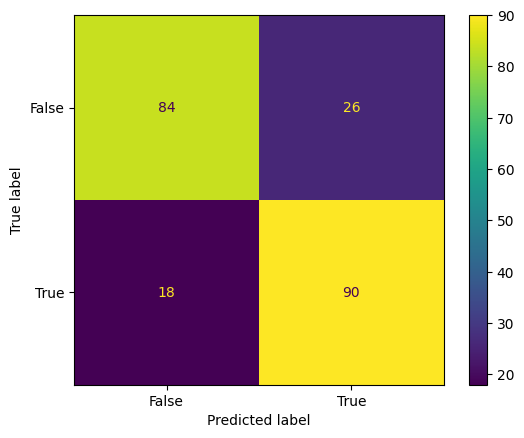

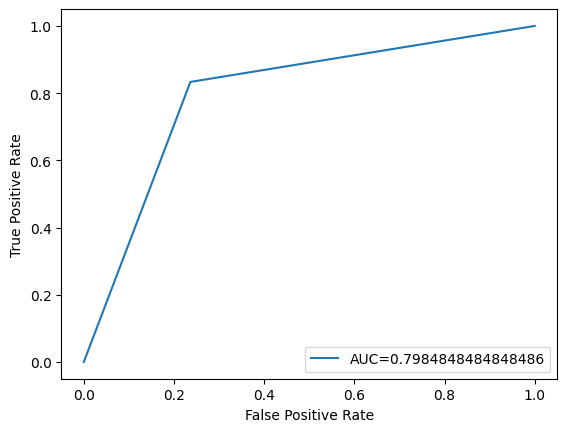

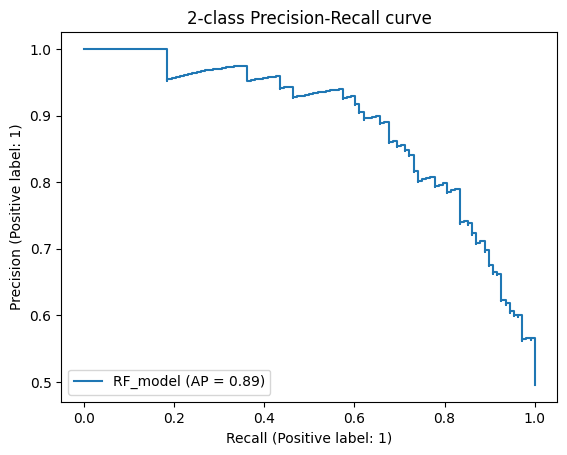

In [ ]:
from sklearn.ensemble import RandomForestClassifier
## Instantiate model with n number of decision trees
RF_model = RandomForestClassifier(n_estimators = 250, min_samples_split = 6, min_samples_leaf= 12)
#Training the model and estimate training time 
t0 = time.time()
RF_model.fit(X_Train, y_train)
Training_time = time.time()-t0

#Predict on test
t1 = time.time()
test_prediction = RF_model.predict(X_Test)
Testing_time = time.time()-t1

##Check model metrics on test dataset.
print ("Accuracy RF_model = ", metrics.accuracy_score(y_test, test_prediction))
print ("Precision RF_model = ", metrics.precision_score(y_test, test_prediction))
print ("Recall RF_model = ", metrics.recall_score(y_test, test_prediction))
print ("F1 Score RF_model = ", metrics.f1_score(y_test, test_prediction),"\n")
print("Training RF_model time:",Training_time)
print("Testing RF_model time:", Testing_time)
print("One sample time : ",Testing_time/ X_test.shape[0])
#Confusion matrix plotting
confusion_matrix = metrics.confusion_matrix(y_test, test_prediction)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
#AUC curve plotting
fpr, tpr, _ = metrics.roc_curve(y_test,  test_prediction)
auc = metrics.roc_auc_score(y_test, test_prediction)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
#Precision - Recall curve plotting
display = PrecisionRecallDisplay.from_estimator(
  RF_model, X_Test, y_test, name="RF_model")
_ = display.ax_.set_title("2-class Precision-Recall curve")

Accuracy SVM_model =  0.8211009174311926
Precision SVM_model =  0.8108108108108109
Recall SVM_model =  0.8333333333333334
F1 Score SVM_model =  0.8219178082191781 

Training SVM_model time: 102.05735158920288
Testing SVM_model time: 16.813398599624634
One sample time :  0.07712568164965429


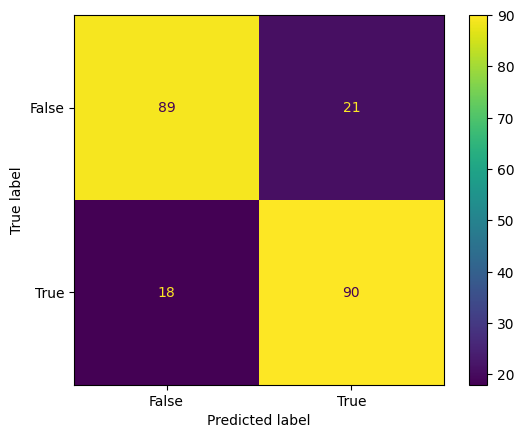

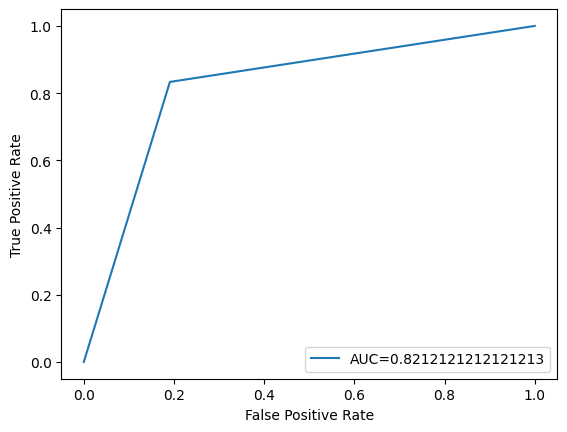

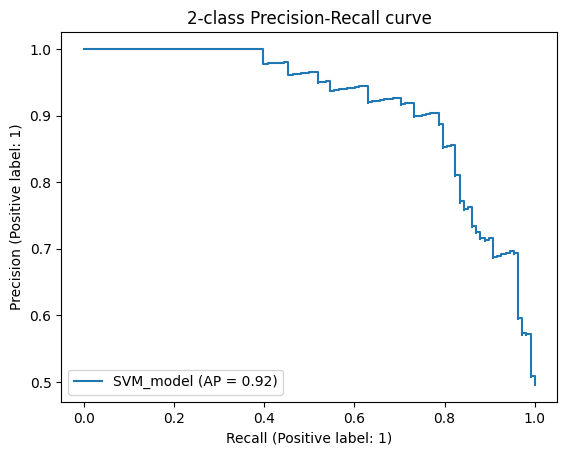

In [ ]:
from sklearn import svm
SVM_model = svm.SVC(kernel='poly')
#Training the model and estimate training time 
t0 = time.time()
SVM_model.fit(X_Train, y_train)
Training_time = time.time()-t0

#Predict on test
t1 = time.time()
test_prediction = SVM_model.predict(X_Test)
Testing_time = time.time()-t1

##Check model metrics on test dataset.
print ("Accuracy SVM_model = ", metrics.accuracy_score(y_test, test_prediction))
print ("Precision SVM_model = ", metrics.precision_score(y_test, test_prediction))
print ("Recall SVM_model = ", metrics.recall_score(y_test, test_prediction))
print ("F1 Score SVM_model = ", metrics.f1_score(y_test, test_prediction),"\n")
print("Training SVM_model time:",Training_time)
print("Testing SVM_model time:", Testing_time)
print("One sample time : ",Testing_time/ X_test.shape[0])
#Confusion matrix plotting
confusion_matrix = metrics.confusion_matrix(y_test, test_prediction)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
#AUC curve plotting
fpr, tpr, _ = metrics.roc_curve(y_test,  test_prediction)
auc = metrics.roc_auc_score(y_test, test_prediction)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
#Precision - Recall curve plotting
display = PrecisionRecallDisplay.from_estimator(
  SVM_model, X_Test, y_test, name="SVM_model")
_ = display.ax_.set_title("2-class Precision-Recall curve")

#Multiclass classification

Accuracy RF_model =  0.6834862385321101
              precision    recall  f1-score   support

           0       0.64      0.99      0.78       110
           1       1.00      0.30      0.46        20
           2       0.83      0.26      0.40        19
           3       0.91      0.38      0.54        26
           4       0.75      0.60      0.67        25
           5       1.00      0.22      0.36        18

    accuracy                           0.68       218
   macro avg       0.85      0.46      0.53       218
weighted avg       0.76      0.68      0.64       218

Training RF_model time: 41.99779224395752
Testing RF_model time: 0.2191472053527832
One sample time :  0.0010052624098751523


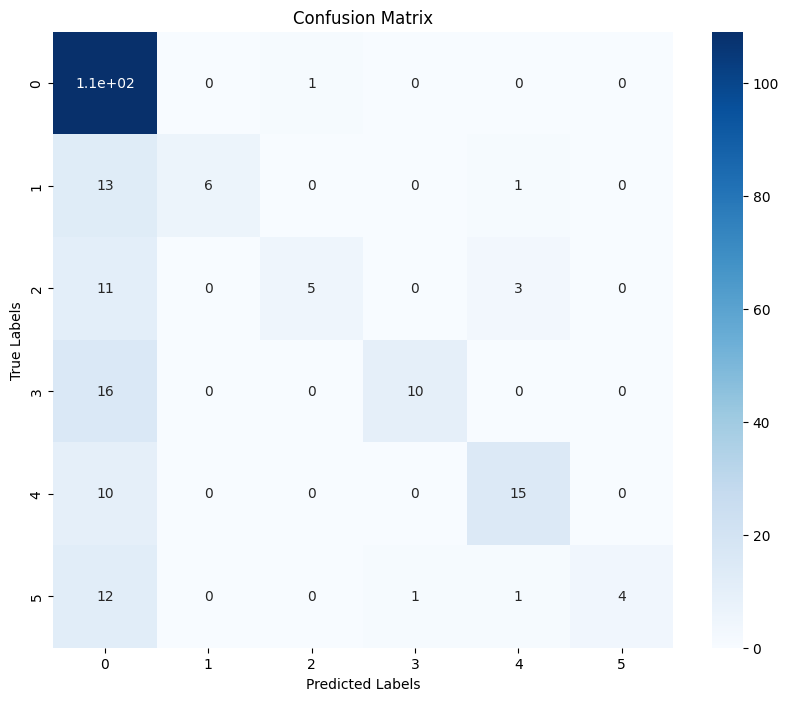

In [14]:
from sklearn.ensemble import RandomForestClassifier
## Instantiate model with n number of decision trees
RF_model = RandomForestClassifier(n_estimators= 200)
#Training the model and estimate training time 
t0 = time.time()
RF_model.fit(X_Train1, y_train1)
Training_time = time.time()-t0

#Predict on test
t1 = time.time()
test_prediction1 = RF_model.predict(X_Test1)
Testing_time = time.time()-t1

print ("Accuracy RF_model = ", metrics.accuracy_score(y_test1, test_prediction1))

print(classification_report(y_test1,test_prediction1))

print("Training RF_model time:",Training_time)
print("Testing RF_model time:", Testing_time)
print("One sample time : ",Testing_time/ X_test1.shape[0])

cm = confusion_matrix(y_test1, test_prediction1,labels = [0,1,2,3,4,5])

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Accuracy SVM_model =  0.6788990825688074
              precision    recall  f1-score   support

           0       0.64      0.97      0.77       110
           1       1.00      0.30      0.46        20
           2       1.00      0.26      0.42        19
           3       0.90      0.35      0.50        26
           4       0.74      0.68      0.71        25
           5       0.67      0.22      0.33        18

    accuracy                           0.68       218
   macro avg       0.82      0.46      0.53       218
weighted avg       0.75      0.68      0.64       218

Training SVM_model time: 144.28224229812622
Testing SVM_model time: 15.19591760635376
One sample time :  0.06970604406584294


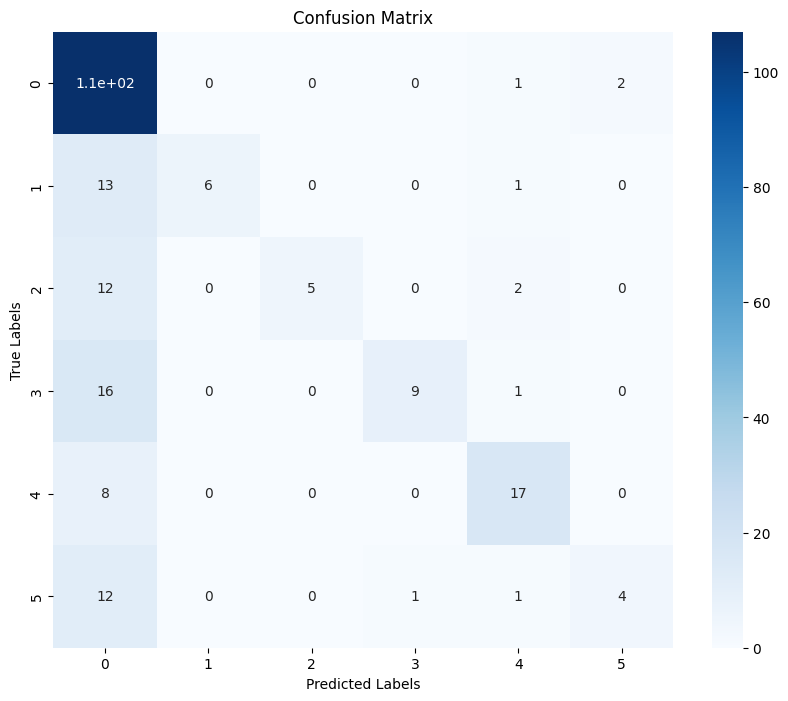

In [13]:
from sklearn import svm
SVM_model = svm.SVC(kernel = "poly", decision_function_shape='ovo')
#Training the model and estimate training time 
t0 = time.time()
SVM_model.fit(X_Train1, y_train1)
Training_time = time.time()-t0

#Predict on test
t1 = time.time()
test_prediction1 = SVM_model.predict(X_Test1)
Testing_time = time.time()-t1

##Check model metrics on test dataset.
print ("Accuracy SVM_model = ", metrics.accuracy_score(y_test1, test_prediction1))
print(classification_report(y_test1,test_prediction1))

print("Training SVM_model time:",Training_time)
print("Testing SVM_model time:", Testing_time)
print("One sample time : ",Testing_time/ X_test1.shape[0])

cm = confusion_matrix(y_test1, test_prediction1,labels = [0,1,2,3,4,5])
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Accuracy Knn_model =  0.5
              precision    recall  f1-score   support

           0       0.61      0.79      0.69       110
           1       0.00      0.00      0.00        20
           2       0.19      0.58      0.29        19
           3       0.67      0.23      0.34        26
           4       0.80      0.16      0.27        25
           5       0.25      0.06      0.09        18

    accuracy                           0.50       218
   macro avg       0.42      0.30      0.28       218
weighted avg       0.52      0.50      0.45       218

Training Knn_model time: 1.9458560943603516
Testing Knn_model time: 1.4420640468597412
One sample time :  0.006614972692017162


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


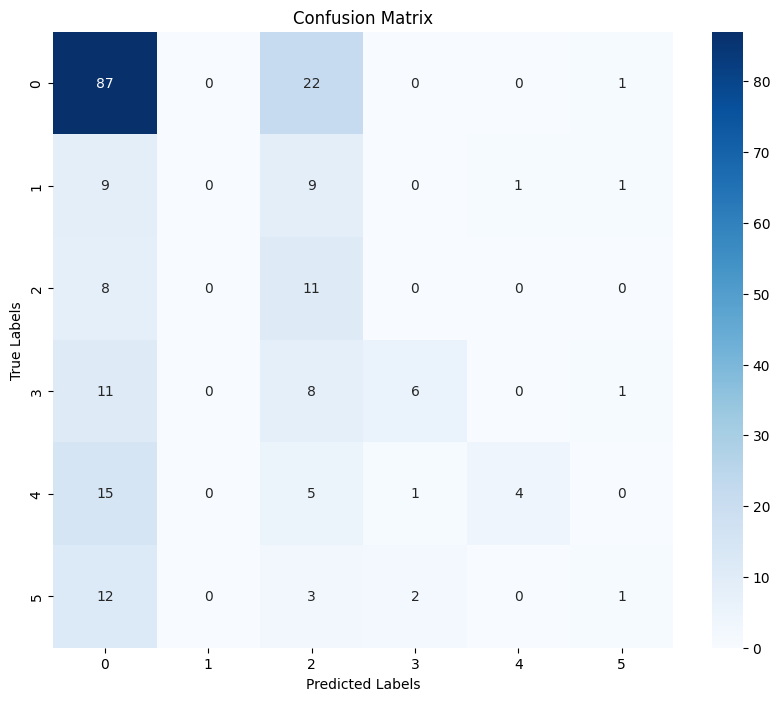

In [18]:
from sklearn.neighbors import KNeighborsClassifier
Knn_model = KNeighborsClassifier(n_neighbors=70)
Knn_model.fit(X_Train1, y_train1)
t0 = time.time()
test_prediction1 = Knn_model.predict(X_Test1)
Training_time = time.time()-t0

#Predict on test
t1 = time.time()
test_prediction1 = Knn_model.predict(X_Test1)
Testing_time = time.time()-t1

##Check model metrics on test dataset.
print ("Accuracy Knn_model = ", metrics.accuracy_score(y_test1, test_prediction1))
print(classification_report(y_test1,test_prediction1))

print("Training Knn_model time:",Training_time)
print("Testing Knn_model time:", Testing_time)
print("One sample time : ",Testing_time/ X_test1.shape[0])

cm = confusion_matrix(y_test1, test_prediction1,labels = [0,1,2,3,4,5])
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#Logistic Regression model

Accuracy LG_model =  0.6926605504587156
              precision    recall  f1-score   support

           0       0.66      0.97      0.78       110
           1       0.82      0.45      0.58        20
           2       0.64      0.37      0.47        19
           3       0.83      0.38      0.53        26
           4       0.93      0.56      0.70        25
           5       0.67      0.22      0.33        18

    accuracy                           0.69       218
   macro avg       0.76      0.49      0.57       218
weighted avg       0.72      0.69      0.66       218

Training LG_model time: 455.33513855934143
Testing LG_model time: 0.12427878379821777
One sample time :  0.0005700861642120082


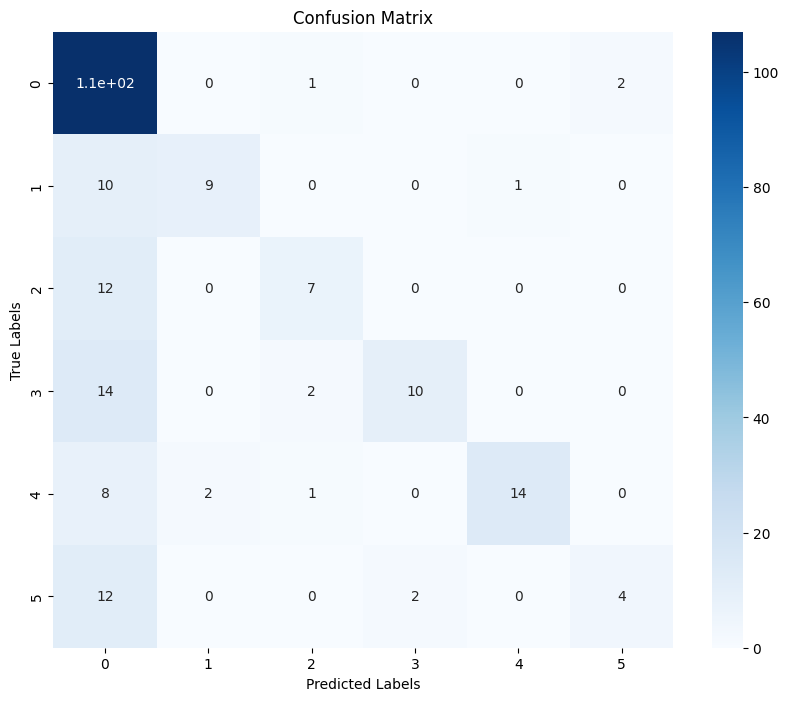

In [ ]:
from sklearn.linear_model import LogisticRegression
LG_model = LogisticRegression(max_iter=10000)

t0 = time.time()
LG_model.fit(X_Train1, y_train1)
Training_time = time.time()-t0

#Predict on test
t1 = time.time()
test_prediction1 = LG_model.predict(X_Test1)
Testing_time = time.time()-t1

##Check model metrics on test dataset.
print ("Accuracy LG_model = ", metrics.accuracy_score(y_test1, test_prediction1))
print(classification_report(y_test1,test_prediction1))

print("Training LG_model time:",Training_time)
print("Testing LG_model time:", Testing_time)
print("One sample time : ",Testing_time/ X_test1.shape[0])

cm = confusion_matrix(y_test1, test_prediction1,labels = [0,1,2,3,4,5])
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy XGB_model =  0.7201834862385321
              precision    recall  f1-score   support

           0       0.68      0.98      0.80       110
           1       0.89      0.40      0.55        20
           2       0.75      0.47      0.58        19
           3       0.83      0.38      0.53        26
           4       0.84      0.64      0.73        25
           5       1.00      0.33      0.50        18

    accuracy                           0.72       218
   macro avg       0.83      0.54      0.61       218
weighted avg       0.77      0.72      0.69       218

Training XGB_model time: 2676.721717596054
Testing XGB_model time: 0.20582890510559082
One sample time :  0.0009441692894751872


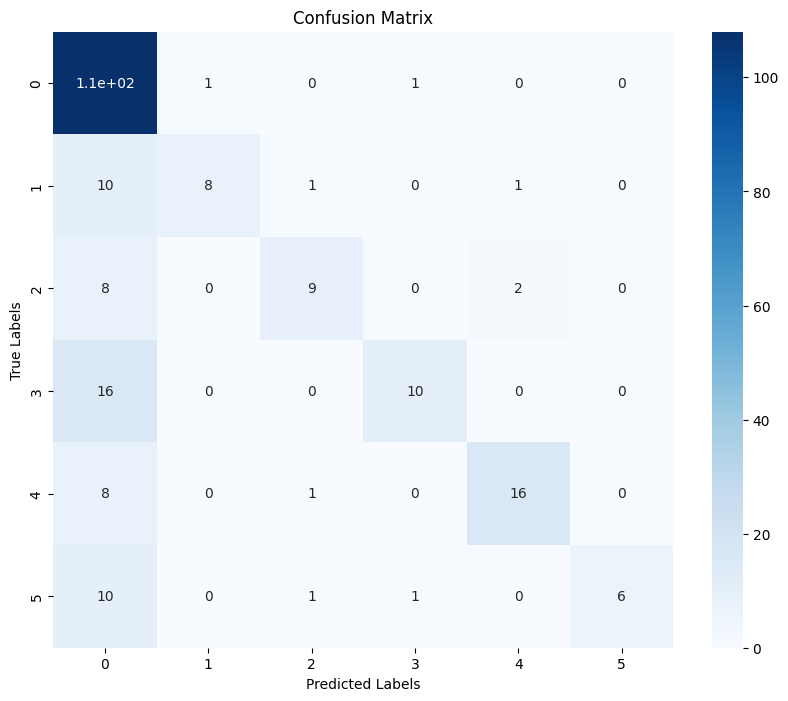

In [ ]:
import xgboost as xgb
# Create an XGBoost classifier
XGB_model = xgb.XGBClassifier()

t0 = time.time()
XGB_model.fit(X_Train1, y_train1)
Training_time = time.time()-t0

#Predict on test
t1 = time.time()
test_prediction1 = XGB_model.predict(X_Test1)
Testing_time = time.time()-t1

##Check model metrics on test dataset.
print ("Accuracy XGB_model = ", metrics.accuracy_score(y_test1, test_prediction1))
print(classification_report(y_test1,test_prediction1))

print("Training XGB_model time:",Training_time)
print("Testing XGB_model time:", Testing_time)
print("One sample time : ",Testing_time/ X_test1.shape[0])

cm = confusion_matrix(y_test1, test_prediction1,labels = [0,1,2,3,4,5])
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Accuracy LGB_model =  0.7018348623853211
              precision    recall  f1-score   support

           0       0.66      0.99      0.79       110
           1       1.00      0.35      0.52        20
           2       0.58      0.37      0.45        19
           3       0.91      0.38      0.54        26
           4       0.84      0.64      0.73        25
           5       1.00      0.22      0.36        18

    accuracy                           0.70       218
   macro avg       0.83      0.49      0.57       218
weighted avg       0.76      0.70      0.66       218

Training LGB_model time: 3252.1117446422577
Testing LGB_model time: 0.2881174087524414
One sample time :  0.0013216394896900983


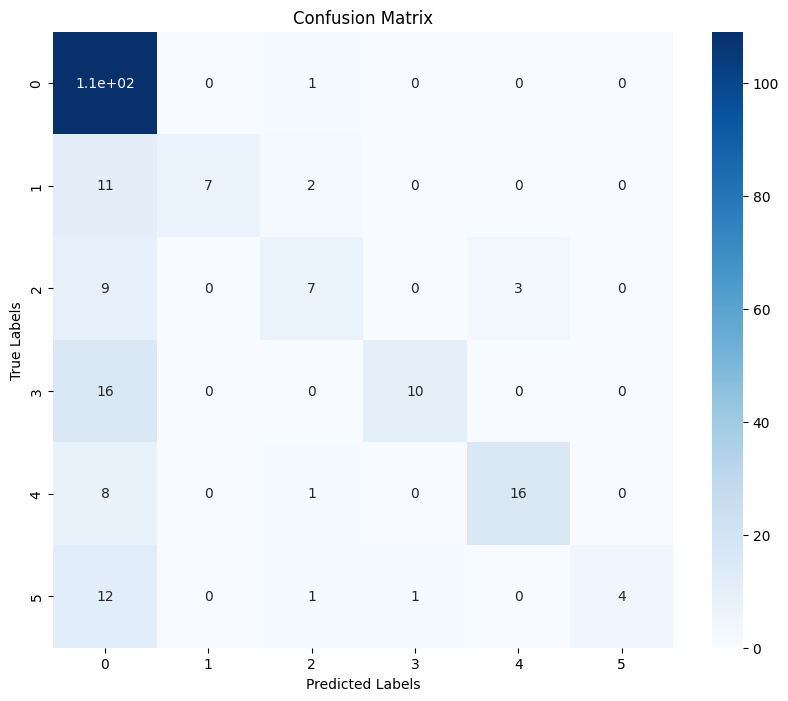

In [19]:
import lightgbm as lgb
# Create a LightGBM classifier
LGB_model = lgb.LGBMClassifier()

t0 = time.time()
LGB_model.fit(X_Train1, y_train1)
Training_time = time.time()-t0

#Predict on test
t1 = time.time()
test_prediction1 = LGB_model.predict(X_Test1)
Testing_time = time.time()-t1

##Check model metrics on test dataset.
print ("Accuracy LGB_model = ", metrics.accuracy_score(y_test1, test_prediction1))
print(classification_report(y_test1,test_prediction1))

print("Training LGB_model time:",Training_time)
print("Testing LGB_model time:", Testing_time)
print("One sample time : ",Testing_time/ X_test1.shape[0])

cm = confusion_matrix(y_test1, test_prediction1,labels = [0,1,2,3,4,5])
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()